# Pandas for Data Manipulation in Python

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/nhkim55/bigdata_fintech_python/blob/main/code/ch8_pandas2.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/nhkim55/bigdata_fintech_python/blob/main/code/ch8_pandas2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 날짜와 시간 다루기

### 문자열을 날짜로 변환하기

In [12]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd

# 문자열을 만듭니다.
date_strings = np.array(['03-04-2005 11:35 PM',
                         '23-05-2010 12:01 AM',
                         '04-09-2009 09:09 PM'])

# Timestamp 객체로 바꿉니다.
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [ ]:
# 오류 처리를 위한 errors매개변수 추가
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="ignore")
for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

### 붙임

In [ ]:
pd.to_datetime(date_strings)

DatetimeIndex(['2005-03-04 23:35:00', '2010-05-23 00:01:00',
               '2009-04-09 21:09:00'],
              dtype='datetime64[ns]', freq=None)

### 시간대 다루기

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# datetime을 만듭니다.
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [ ]:
# datetime을 만듭니다. 
date = pd.Timestamp('2017-05-01 06:00:00')

# 시간대를 지정합니다.
date_in_london = date.tz_localize('Europe/London')

# datetime을 확인합니다.
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [ ]:
# 시간대를 바꿉니다.
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2017-05-01 05:00:00+0000', tz='Africa/Abidjan')

In [25]:
# 세 개의 날짜를 만듭니다.
dates = pd.Series(pd.date_range('1/1/2021', periods=3, freq='M'))

# 시간대를 지정합니다.
dates.dt.tz_localize('Africa/Abidjan')

0   2021-01-31 00:00:00+00:00
1   2021-02-28 00:00:00+00:00
2   2021-03-31 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

In [26]:
# 라이브러리를 임포트합니다.
from pytz import all_timezones

# 두 개의 시간대를 확인합니다.
all_timezones[0:3]

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa']

### 붙임

In [ ]:
dates.dt.tz_localize('dateutil/Aisa/Seoul')

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [ ]:
import pytz

tz = pytz.timezone('Asia/Seoul')
dates.dt.tz_localize(tz)

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]

### 날짜와 시간 선택

In [29]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# datetime을 만듭니다.
dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')

# 두 datetime 사이의 샘플을 선택합니다.
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
          (dataframe['date'] <= '2002-1-1 04:00:00')]

,date
8762,2002-01-01 02:00:00
8763,2002-01-01 03:00:00
8764,2002-01-01 04:00:00


In [ ]:
# 인덱스를 설정합니다.
dataframe = dataframe.set_index(dataframe['date'])

# 두 datetime 사이 샘플을 선택합니다.
dataframe.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

,date
date,
2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01 04:00:00


### 날짜 데이터를 여러 특성으로 나누기

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 다섯 개의 날짜를 만듭니다.
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')

# 년, 월, 일, 시, 분에 대한 특성을 만듭니다.
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

# 세 개의 행을 확인합니다.
dataframe.head(3)

,date,year,month,day,hour,minute
0,2001-01-07,2001,1,7,0,0
1,2001-01-14,2001,1,14,0,0
2,2001-01-21,2001,1,21,0,0


### 날짜 간의 차이를 계산하기

In [31]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 두 datetime 특성을 만듭니다.
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

# 특성 사이의 차이를 계산합니다.
dataframe['Left'] - dataframe['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [ ]:
# 특성 간의 기간을 계산합니다.
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived']))

0    0
1    2
dtype: int64

### 요일을 인코딩하기

In [40]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 시리즈 객체를 만듭니다.
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))

# 요일을 확인합니다.
dates.dt.day_name()

0    Thursday
1      Sunday
2     Tuesday
dtype: object

In [41]:
# 요일을 확인합니다.
dates.dt.weekday

0    3
1    6
2    1
dtype: int64

### 시차 특성 만들기

In [43]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 날짜를 만듭니다.
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

# 한 행 뒤의 값을 가져옵니다.
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)

# 데이터프레임을 확인합니다.
dataframe

,dates,stock_price,previous_days_stock_price
0,2001-01-01,1.1,NaN
1,2001-01-02,2.2,1.1
2,2001-01-03,3.3,2.2
3,2001-01-04,4.4,3.3
4,2001-01-05,5.5,4.4


### 이동 시간 윈도 사용하기

In [44]:
# 라이브러리를 임포트합니다.
import pandas as pd

# datetime을 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 설정합니다.
dataframe = pd.DataFrame(index=time_index)

# 특성을 만듭니다.
dataframe["Stock_Price"] = [1,2,3,4,5]

# 이동 평균을 계산합니다.
dataframe.rolling(window=2).mean()

,Stock_Price
2010-01-31,NaN
2010-02-28,1.5
2010-03-31,2.5
2010-04-30,3.5
2010-05-31,4.5


### 붙임

In [48]:
dataframe.ewm(alpha=0.5).mean()

,Stock_Price
2010-01-31,1.000000
2010-02-28,1.666667
2010-03-31,2.428571
2010-04-30,3.266667
2010-05-31,4.161290


### 시계열 데이터에서 누락된 값 다루기

In [57]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜를 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 지정합니다.
dataframe = pd.DataFrame(index=time_index)

# 누락된 값이 있는 특성을 만듭니다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]

# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [ ]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [ ]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


In [ ]:
# 누락된 값을 보간하기
dataframe.interpolate(method="quadratic")

,Sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


In [52]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


In [58]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="backward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,4.0
2010-05-31,5.0


### 시간에 따라 행 그룹핑

In [64]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜 범위를 만듭니다.
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')
# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(index=time_index)

# 난수 값으로 열을 만듭니다.
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

# 주 단위로 행을 그룹핑한 다음 합을 계산합니다.
dataframe.resample('W').sum()

,Sale_Amount
2017-06-11,86351
2017-06-18,100638
2017-06-25,101242
2017-07-02,101031
2017-07-09,100938
2017-07-16,10280


In [63]:
# 원본 데이터
dataframe.head(3)

,Sale_Amount
2017-06-06 00:00:00,7
2017-06-06 00:00:30,4
2017-06-06 00:01:00,6


In [65]:
# 2주 단위로 그룹핑하고 평균을 계산합니다.
dataframe.resample('2W').mean()

,Sale_Amount
2017-06-11,4.997164
2017-06-25,5.006944
2017-07-09,5.009152
2017-07-23,4.942308


In [66]:
# 한 달 간격으로 그룹핑하고 행을 카운트합니다.
dataframe.resample('M').count()

,Sale_Amount
2017-06-30,72000
2017-07-31,28000


In [67]:
# 월 간격으로 그룹핑하고 행을 카운트합니다.
dataframe.resample('M', label='left').count()

,Sale_Amount
2017-05-31,72000
2017-06-30,28000


In [68]:
# 그룹핑된 인덱스를 월의 시작 날짜로 만들려면 'MS'사용
dataframe.resample('MS').count()

,Sale_Amount
2017-06-01,72000
2017-07-01,28000


## pandas로 그래프 그리기

### 선그래프

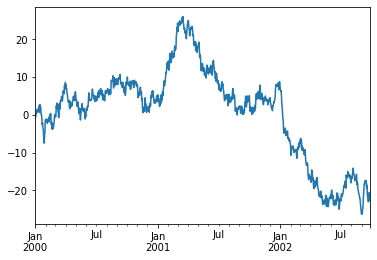

In [69]:
import pandas as pd

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

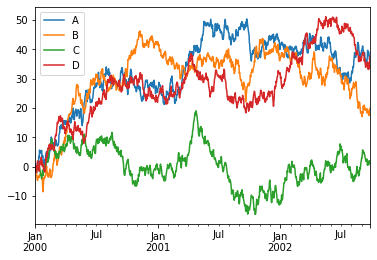

In [71]:
# 각 열별로 선 그래프 그리기
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

df.plot();

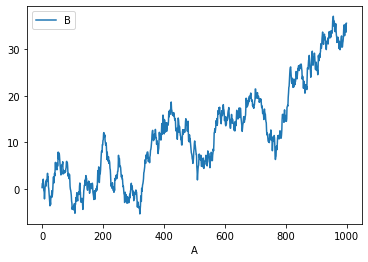

In [72]:
# 각 열을 다른 열과 plot할 수 있음
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B");

### 막대그래프

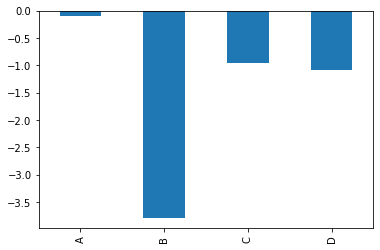

In [73]:
df.iloc[5].plot(kind="bar")

In [ ]:
df.plot.

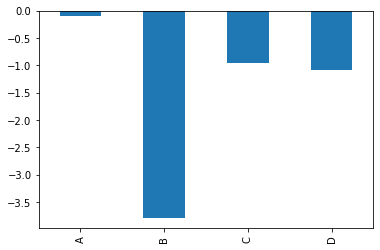

In [74]:
df.iloc[5].plot.bar()

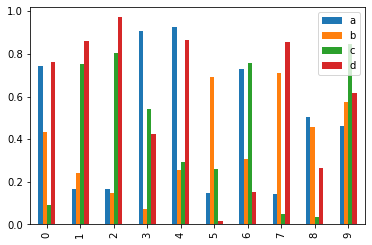

In [75]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar();

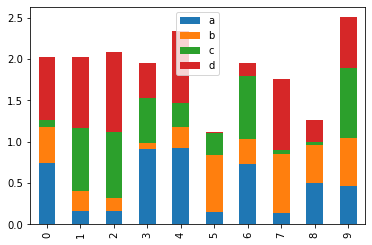

In [76]:
df2.plot.bar(stacked=True)

### 히스토그램

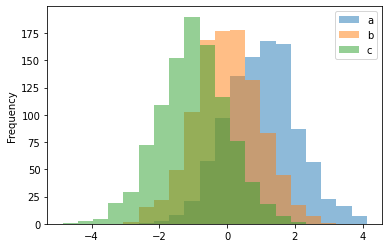

In [102]:
df4 = pd.DataFrame({"a": np.random.randn(1000) + 1,
                    "b": np.random.randn(1000),
                    "c": np.random.randn(1000) - 1})
 
df4.plot.hist(alpha=0.5, bins=20);

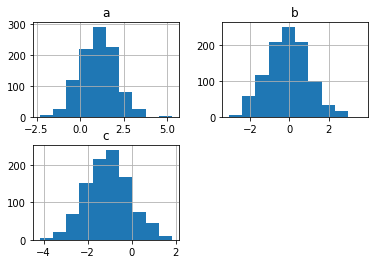

In [92]:
h=df4.hist()

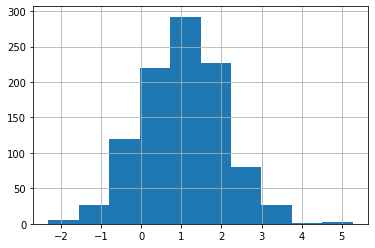

In [93]:
h =df4['a'].hist(bins=10)

### 밀도 그래프

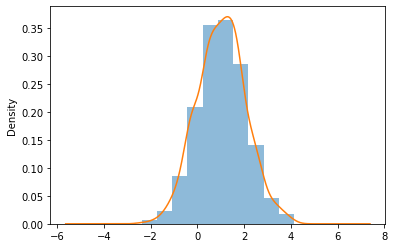

In [116]:
df4['a'].hist(alpha=0.5,density=True)
df4['a'].plot(kind='kde')

### 상자 그림

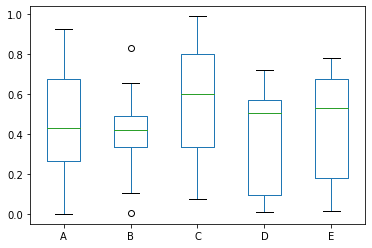

In [89]:
# 컬럼 별 상자그림
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df.plot.box();

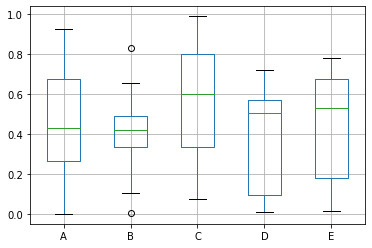

In [90]:
bp = df.boxplot()

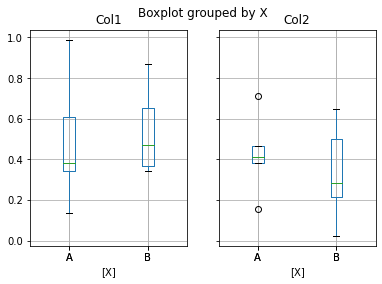

In [100]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

bp = df.boxplot(by="X")

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

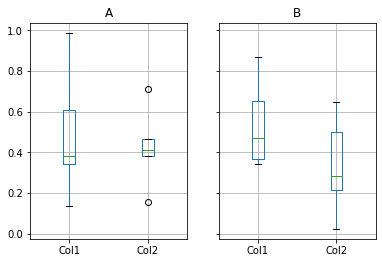

In [101]:
df.groupby('X').boxplot()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


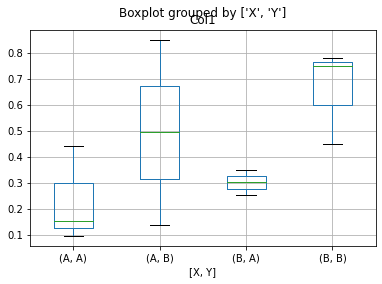

In [98]:
df = pd.DataFrame(np.random.rand(10, 3), columns=["Col1", "Col2", "Col3"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

df["Y"] = pd.Series(["A", "B", "A", "B", "A", "B", "A", "B", "A", "B"])

bp = df.boxplot(column=["Col1"], by=["X", "Y"])

### 산포도 행렬

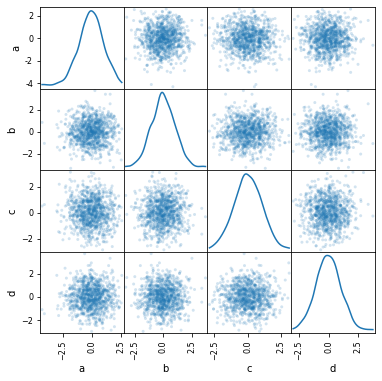

In [117]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");